In [328]:
import pandas as pd

data = pd.read_csv("weather.csv", index_col=0)
data.ffill()

,tmax,tmin,rain,tmax_tomorrow
date,,,,
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...
2022-11-22,62.0,35.0,0.0,67.0
2022-11-23,67.0,38.0,0.0,66.0
2022-11-24,66.0,41.0,0.0,70.0


When using linear regression to predict an outcome based from a certain feature, we assume that there is a linear relationship between them.

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

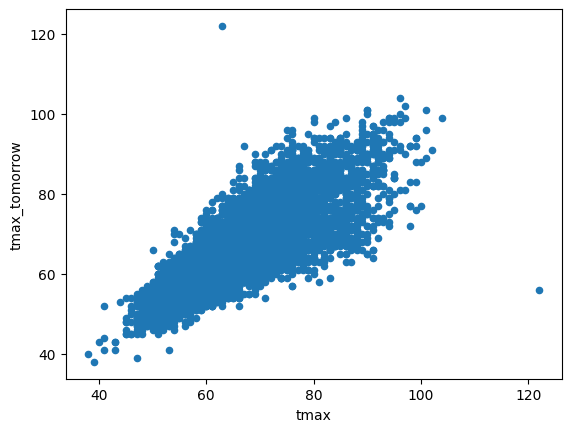

In [329]:
data.plot.scatter("tmax", "tmax_tomorrow")

In [330]:
# Let us check if there is a linear correlationship between the value we are trying to predict, say tmax_tomorror for this instance:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615134,-0.221703,0.818820
tmin,0.615134,1.000000,-0.018215,0.584958
rain,-0.221703,-0.018215,1.000000,-0.213239
tmax_tomorrow,0.818820,0.584958,-0.213239,1.000000


As we see, there might be a linear correlation between "tmax" and "tmax_tomorrow" but no significant relationship between "tmax_tomorrow" and other features. The closer the correlation to 1, the strong the relationship.

Let us try to dig more in to linear relationship of "tmax" with "tmax_tomorrow"

In [331]:
# Divide the tmax into bins
tmax_bins = pd.cut(data["tmax"], 25)

#Calculate the ratio of between tmax_tomorrow and tmax to see if it is linear or the same.
ratios = data["tmax_tomorrow"] / data["tmax"]

# Average ratios for each bin
binned_ratio = ratios.groupby(tmax_bins).mean()
binned_ratio

tmax
(37.916, 41.36]     1.073909
(41.36, 44.72]      1.039508
(44.72, 48.08]      1.053182
(48.08, 51.44]      1.043955
(51.44, 54.8]       1.029308
(54.8, 58.16]       1.014431
(58.16, 61.52]      1.012453
(61.52, 64.88]      1.011821
(64.88, 68.24]      1.009402
(68.24, 71.6]       1.001454
(71.6, 74.96]       0.990317
(74.96, 78.32]      0.979662
(78.32, 81.68]      0.954210
(81.68, 85.04]      0.944181
(85.04, 88.4]       0.907703
(88.4, 91.76]       0.929598
(91.76, 95.12]      0.927581
(95.12, 98.48]      0.923545
(98.48, 101.84]     0.891356
(101.84, 105.2]     0.922040
(105.2, 108.56]          NaN
(108.56, 111.92]         NaN
(111.92, 115.28]         NaN
(115.28, 118.64]         NaN
(118.64, 122.0]     0.459016
dtype: float64

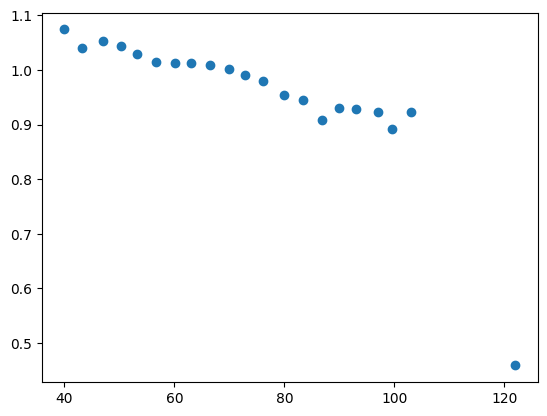

In [332]:
# Plot the tmax and binned ratio (ratio between tmax_tomorrow and tmin)
import matplotlib.pyplot as plt

# Group the data into bins as binned ratio is also grouped
binned_tmax = data["tmax"].groupby(tmax_bins).mean()

plt.scatter(binned_tmax, binned_ratio)

As we can see, the ratio is not constant which further signifies that there not be a linear relationship between tmax and tmax_tomorrow. The same steps above can be done the verify the correlations between other features.

One of the keys to apply no-linearity on each hidden layer output, is to introduce a relu function.
In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

$y = WX + B$

$y = relu(WX + B)$

Let us look at below function to visualize relu

In [333]:
import numpy as np

#Supposed we have a list of temperatures
temps = np.arange(-50, 50)

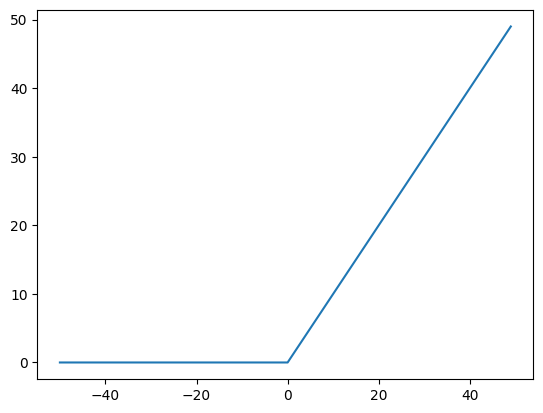

In [334]:
# RELU function in this case: np.maximum(0, temps)
plt.plot(temps, np.maximum(0, temps))

What is the derivative of a relu function?

A "derivative" is just the slope of the graph at certain point. So what is the slope of the graph at the point  x=40?

We can visually look at the segment where x=40 and see that the slope is 1. In fact, this holds everywhere >0. The slope is 1.

What is the slope of the graph when x=-48? Visually, we see that there is no slope (change in Y), so the slope is 0. In fact, for all negative numbers, the slope is 0.

In a 2-layer neural network, we have the following:

$y_{1} = W_{1}X_{1} + B_1$ ----1st layer

$y_{1}activated = relu(W_{1}X_{1} + B_1)$ -----activated 1st layer

$\hat{y} = w_{2}(relu(W_{1}X_{1} + B_{1}))$ ----- Output Layer

Let us visualize the the output graph based from the layer 1 and layer 2

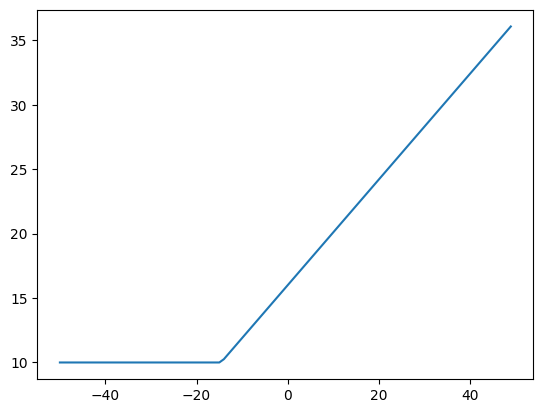

In [335]:
# Say we already have a model with an initialized values for weight and b for layer 1
prediction = lambda x, w1=0.82, b= 11.99: x * w1 + b

layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, 0.5, 10) #0.5 and 10 are the weight and bias parameters for layer 2

plt.plot(temps, layer2)

As we see above, the graph of layer 2 seems to be linear though a relu has already been introduced on layer 1.

In neural network, multiple hidden units per layer are added in order to introduce more non-linearity.

Look at the figure below:

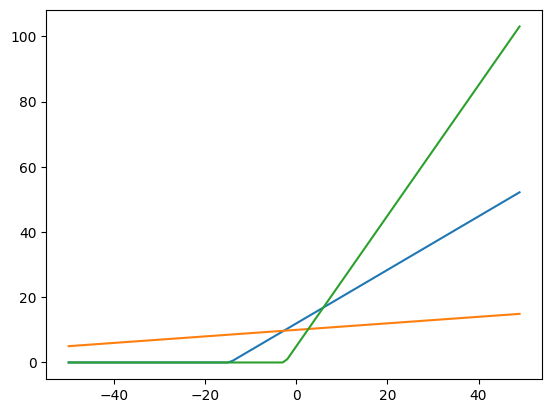

In [336]:
#Say we have 2 units on layer 1
layer1_1 = np.maximum(0, prediction(temps))
layer1_2 = np.maximum(0, prediction(temps, 0.1, 10))
layer1_3 = np.maximum(0, prediction(temps, 2, 5))

plt.plot(temps, layer1_1)
plt.plot(temps, layer1_2)
plt.plot(temps, layer1_3)

In the above figure, layer1_2 unit is passing all the information about the input temps without being activate by relu. This is because of a different weight and bias for layer1_2.

Succeeding layers adds up each activated units from the previous layers multiplied each by the corresponding weights in the current layer (plus bias).

Roughly, we can visualize the non-linear relationship. See the below figure:

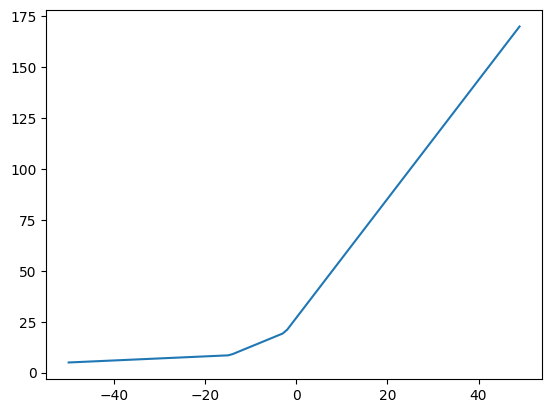

In [337]:
#Say we are plotting one unit on layer 2
plt.plot(temps, layer1_1 + layer1_2 + layer1_3)

Let us now try mock implemention of the network:

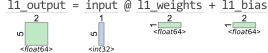

In [338]:
import tsensor #To help visualize the matrices operations

#Initial sample input values
input = np.array([[80], [90], [100], [-20], [-10]])

# Initiate weights and biases for L1. Suppose we only have two unit or node
l1_weights = np.array([[0.82, 0.1]])

l1_bias = np.array([[11.99, 10]])

with tsensor.explain():
    l1_output = input @ l1_weights + l1_bias


In [339]:
l1_activated = np.maximum(l1_output, 0)

l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

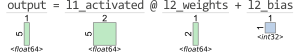

In [340]:
#Initiate weights and biases for L2
l2_weights = np.array([[0.5], [0.2]])
l2_bias = np.array([[5]])

with tsensor.explain():
    output = l1_activated @ l2_weights + l2_bias

In [341]:
#Say we have the following values:
tmax = input
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-91]])

In [342]:
# MEAN SQUARED ERROR
def mse(actual, predicted):
    return (actual - predicted) ** 2

mse(tmax_tomorrow, output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [9939.093025]])

In [343]:
# MSE Gradient (Error Gradient / Output Error Gradient)
# Derivatie of the loss function with respect to the output
def mse_grad(actual, predicted):
    return predicted - actual

In [344]:
mse_grad(tmax_tomorrow, output)

array([[-35.605],
       [-37.305],
       [-39.005],
       [ 28.6  ],
       [ 99.695]])

In [345]:
# Calculate output gradient with MSE gradient fuction

output_gradient = mse_grad(tmax_tomorrow, output)

Calculate the output weight gradient, which is equal to the derivative of the loss L with respect to $W_2$

$L = y_a - \hat{y}$

$L = y_a - (W_2(X1) + B_2)$

$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial W_2X_1} \frac{\partial W_2X_1}{\partial W_2}$

$\partial W_2X_1 =  \partial L$ is the derivative of the loss or the loss gradient

$\frac{\partial W_2X_1}{\partial W_2} = X_1$

Therefore, the weight gradient is equal to ${\partial L}*X_1$, where $X_1$ is the layer 1 activated output

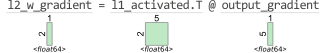

array([[-9251.2238],
       [-1003.73  ]])

In [346]:
# Calculate the weight gradient.
# The derivative of the Output Gradient with respect to W2

from tsensor import explain as exp

with exp():
    l2_w_gradient = l1_activated.T @ output_gradient

l2_w_gradient

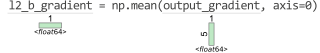

array([3.276])

In [347]:
# Calculate the bias gradient. It is equal to the average of the output gradient.
with exp():
    l2_b_gradient = np.mean(output_gradient, axis=0)

l2_b_gradient

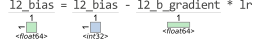

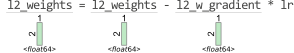

array([[0.59251224],
       [0.2100373 ]])

In [348]:
# Learning rate
lr = 1e-5

with exp():
    #Update the weights and biases based from the calculated gradients
    l2_bias = l2_bias - l2_b_gradient * lr
    l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

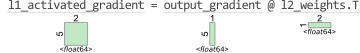

array([[-21.09639823,  -7.47837807],
       [-22.10366904,  -7.83544148],
       [-23.11093984,  -8.19250489],
       [ 16.94585001,   6.00706678],
       [ 59.07050757,  20.93966862]])

In [349]:
# Calculate the L1 Output Gradient

with exp():
    l1_activated_gradient = output_gradient @ l2_weights.T

l1_activated_gradient

Note that the L1 Output is transformed with ReLU function. To be able to calculate the weight and bias gradient of layer1, the layer 1 output must be pulled across the activated function.

Mathematical representation and rules
The mathematical representation of the Heavyside step function, along with the rules for calculating it, is defined as follows:

$H(x1, x2) = 0 $, if $x1 < 0$

$H(x1, x2) = x2 $, if $x1 = 0$

$H(x1, x2) = 1 $, if $x1 > 0$

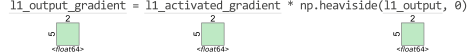

array([[-21.09639823,  -7.47837807],
       [-22.10366904,  -7.83544148],
       [-23.11093984,  -8.19250489],
       [  0.        ,   6.00706678],
       [ 59.07050757,  20.93966862]])

In [350]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)

l1_output_gradient

In [351]:
# Calculate for weight gradient of layer 1
l1_w_gradient = input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient)

#Update the weights and biases.
l1_weights = l1_weights - l1_w_gradient * lr
l1_bias = l1_bias - l1_b_gradient * lr

In [352]:
l1_weights

array([[0.88578841, 0.12452248]])

In [353]:
l1_bias

array([[11.9900038, 10.0000038]])

At this point, let us finalize the neural network code:

In [354]:
import numpy as np
from sklearn.preprocessing import StandardScaler

PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

#Scale our data, to have a mean of zero
scaler = StandardScaler()

#Fit and transform the data into the scaler model
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])

(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

In [355]:
train_x

array([[-0.72730375, -2.27405096, -0.25506937],
       [-1.68867338, -1.68456268, -0.25506937],
       [-1.68867338, -2.27405096, -0.25506937],
       ...,
       [ 0.47440827,  1.70499492, -0.25506937],
       [ 0.23406587,  1.26287872, -0.25506937],
       [ 1.31560669,  1.26287872, -0.25506937]])

In [356]:
# Initialize the layer parameters (In between input and output): Weights and Biases

def init_layers(inputs):
    layers_parameters = [] #Array of weights and biases matrix for each layer
    for i in range(1, len(inputs)):
        layers_parameters.append([
            # Weight matrix shape is equal to number of columns in the previous layer X number of columns in the current layer
            np.random.rand(inputs[i-1], inputs[i]) / 5 - 0.1,

            # Bias matrix is shape is equal to 1 x number of columns in the current layer
            np.ones((1, inputs[i]))
        ])
    return layers_parameters

In [357]:
def forward(batch, layers):
    # hidden will serve as an array of input to the next layer, with first item as the inputs
    hidden = [batch.copy()]
    for i in range(len(layers)):
        # Calculate the output of the current layer and store it to hiddens
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]

        # Apply ReLU function on layers excluding the output layer
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
            
        hidden.append(batch.copy())
    return batch, hidden


In [358]:
def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def mse_grad(actual, predicted):
    return predicted - actual

In [359]:
def backward(layers, hiddens, grad, lr):
    for i in range(len(layers) - 1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hiddens[i+1], 0))
        
        w_grad = hiddens[i].T @ grad
        b_grad = np.mean(grad, axis=0)
        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        grad = grad  @ layers[i][0].T
    return layers


In [360]:
lr = 1e-6
epochs = 10
batch_size = 100
layer_config = [3, 10, 10, 1]

layers = init_layers(layer_config)

for epoch in range(epochs):
    epoch_loss = []

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]
        pred, hidden = forward(x_batch, layers)
        
        loss = mse_grad(y_batch, pred)
        epoch_loss.append(np.mean(loss ** 2))
        # if i == 0: print(loss)

        layers = backward(layers, hidden, loss, lr)

    valid_preds, _ = forward(valid_x, layers)

    # print(f"Epoch {epoch} Train MSE: {np.mean(epoch_loss)} Valid MSE: {np.mean(mse(valid_preds, valid_y))}")